In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook

In [16]:
# The statistical module used to run chi square test
import scipy.stats as stats
import matplotlib.pyplot as plt
import requests
import json
import gmaps
import requests
import time
from us import states
from config import gkey
from geopy import geocoders

In [29]:
# Observed data in a (hypothetical) survey of 6000 people 
df = pd.read_csv("Resources/2015censuscounty.csv")
df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [8]:
# calculate gender percentages and add them to table
df["Men Percentage"] = df["Men"]/df["TotalPop"]
df["Women Percentage"] = df["Women"]/df["TotalPop"]

df.head()


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Men Percentage,Women Percentage
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.484327,0.515673
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.488487,0.511513
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0.538282,0.461718
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0.534109,0.465891
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0.494056,0.505944


In [6]:
df_clean = pd.read_csv("Resources/2015censuscounty.csv")
df_clean.drop(df_clean.iloc[:, 3:36], inplace = True, axis = 1) 
df_clean.head()
latitude = []
longtitude = []

In [9]:
#for i in range(len(df_clean)) : 
  #print(df.iloc[i, 2], df.iloc[i, 2]) 
for i in range(len(df_clean)):
    target_city = f"{df.iloc[i, 2]},{df.iloc[i, 1]}"
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
                  'address={0}&key={1}').format(target_city, gkey)
    geo_data = requests.get(target_url).json()
    latitude.append(geo_data["results"][0]["geometry"]["location"]["lat"])
    longtitude.append(geo_data["results"][0]["geometry"]["location"]["lng"])


[32.5791817,
 30.6010744,
 31.8172896,
 32.9562798,
 34.0145152,
 32.0573536,
 32.0895908,
 33.7701576,
 32.9028048,
 34.7570342,
 32.944392,
 32.0716631,
 31.7002461,
 33.7026013,
 33.6261707,
 31.4751172,
 34.7117567,
 31.501571,
 32.8897772,
 31.3066438,
 31.6671872,
 34.1748208,
 31.4645298,
 32.2332138,
 34.5211397,
 32.5387448,
 31.1394734,
 34.0455341,
 33.6845539,
 32.4784706,
 31.0329572,
 32.9718107,
 32.7859102,
 31.4469377,
 34.1414925,
 31.5090521,
 32.3859585,
 33.6923649,
 34.8840876,
 34.567428,
 32.5888702,
 34.78000720000001,
 32.221464,
 32.3731182,
 34.6992579,
 32.2459085,
 32.6323536,
 34.3652297,
 30.6953657,
 31.5119068,
 32.3792233,
 34.4240875,
 32.598888,
 33.3339954,
 31.8395163,
 32.8996333,
 32.3552497,
 33.6530112,
 33.1086539,
 32.6155551,
 33.4359416,
 32.9201244,
 33.2098407,
 33.8563605,
 31.3422346,
 32.0105439,
 34.1690087,
 55.53880059999999,
 52.3232697,
 61.2180556,
 61.09344600000001,
 58.7578504,
 63.82571729999999,
 59.80677919999999,
 64.9526

In [14]:
df_clean["Latitude"] = latitude
df_clean["Longitude"]= longtitude
df_clean.head()
df_clean.to_csv("LocationDataframe.csv")

In [31]:
gmaps.configure(api_key=gkey)
clean_df_location = pd.read_csv("LocationDataframe.csv")
locations = clean_df_location[["Latitude", "Longitude"]].astype(float)
unempl_rate = clean_df_location["Unemployment"].astype(float)


In [26]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=unempl_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 0.8

fig.add_layer(heat_layer)

fig



Figure(layout=FigureLayout(height='420px'))

<IPython.core.display.Javascript object>


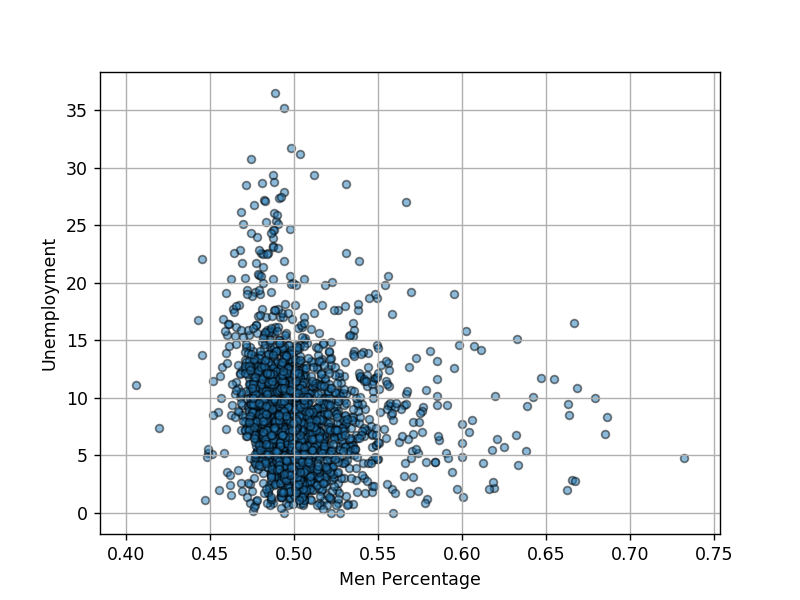

In [6]:
#scatter plot for Men ratio to unemployment
men_unemployment_scatter = df.plot(kind="scatter", x = "Men Percentage", y = "Unemployment", grid=True, alpha = 0.5, edgecolors = "black")

<IPython.core.display.Javascript object>


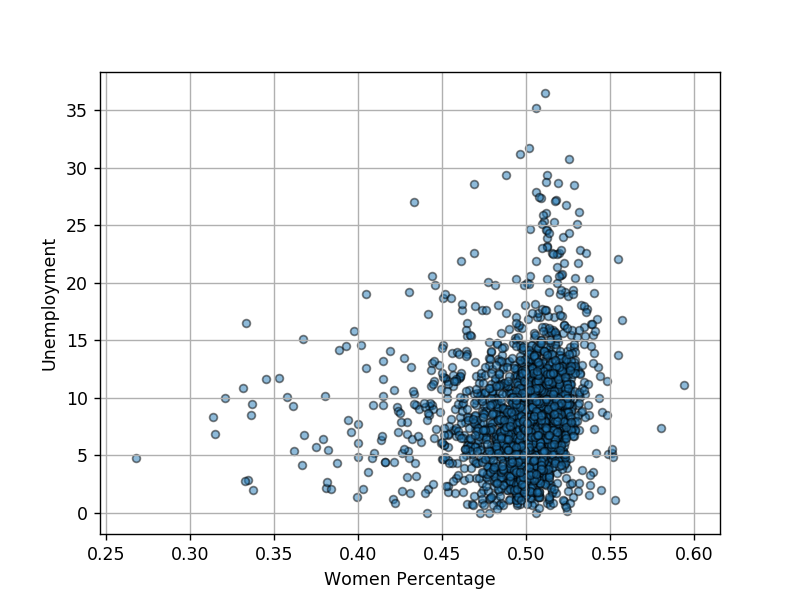

In [7]:
#scatter plot for Women ratio to unemployment
women_unemployment_scatter = df.plot(kind="scatter", x = "Women Percentage", y = "Unemployment", grid=True, alpha = 0.5, edgecolors = "black")

<IPython.core.display.Javascript object>


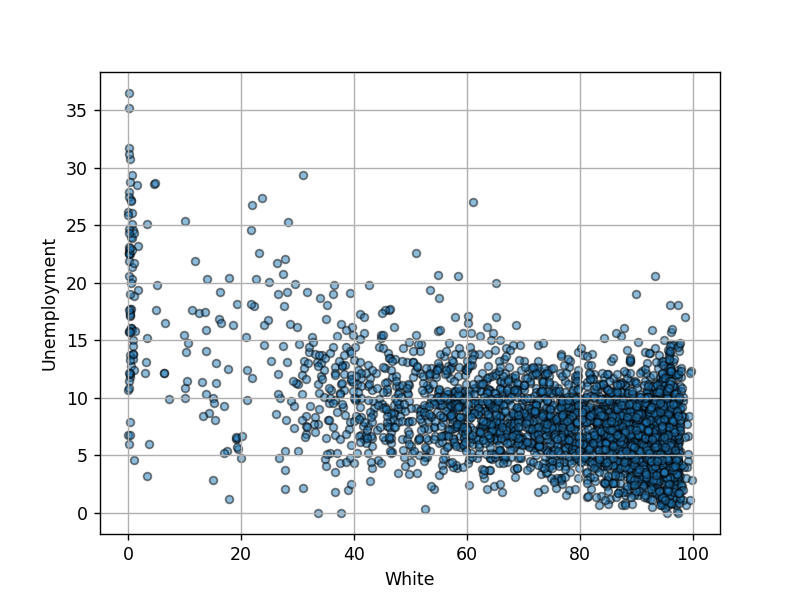

In [8]:
# Calculate the critical value
white_unemp_scatter = df.plot(kind="scatter", x = "White", y = "Unemployment", grid=True, alpha = 0.5, edgecolors = "black")

<IPython.core.display.Javascript object>


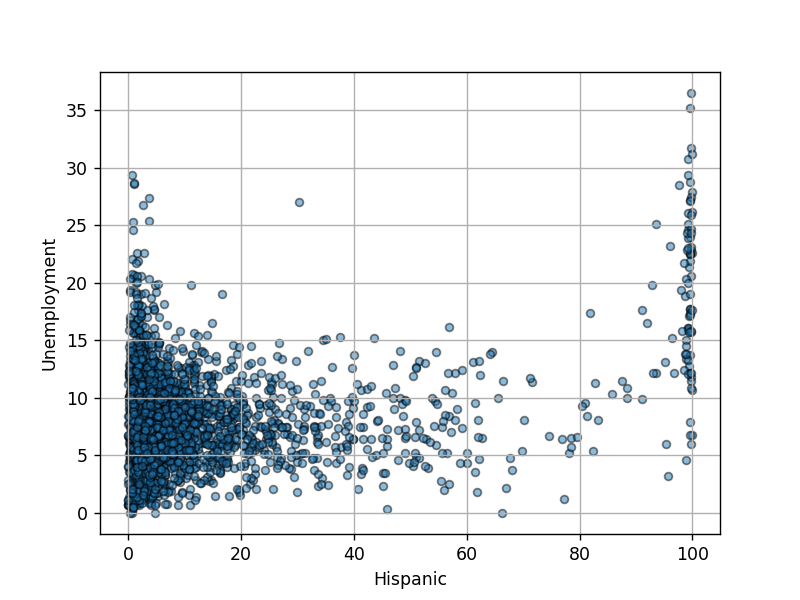

In [9]:
# Print the critical value
hispanic_unemp_scatter = df.plot(kind="scatter", x = "Hispanic", y = "Unemployment", grid=True, alpha = 0.5, edgecolors = "black")

<IPython.core.display.Javascript object>


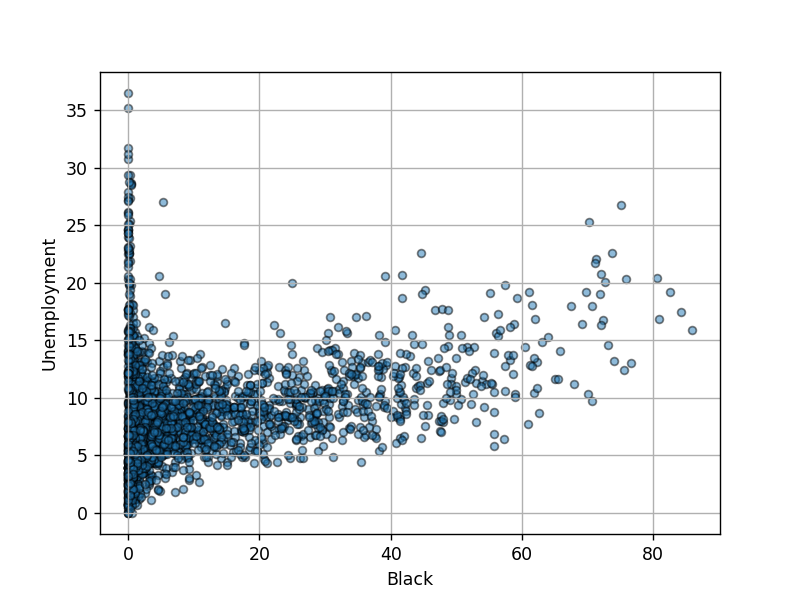

In [10]:
# Run the chi square test with stats.chisquare()
black_unemp_scatter = df.plot(kind="scatter", x = "Black", y = "Unemployment", grid=True, alpha = 0.5, edgecolors = "black")

<IPython.core.display.Javascript object>


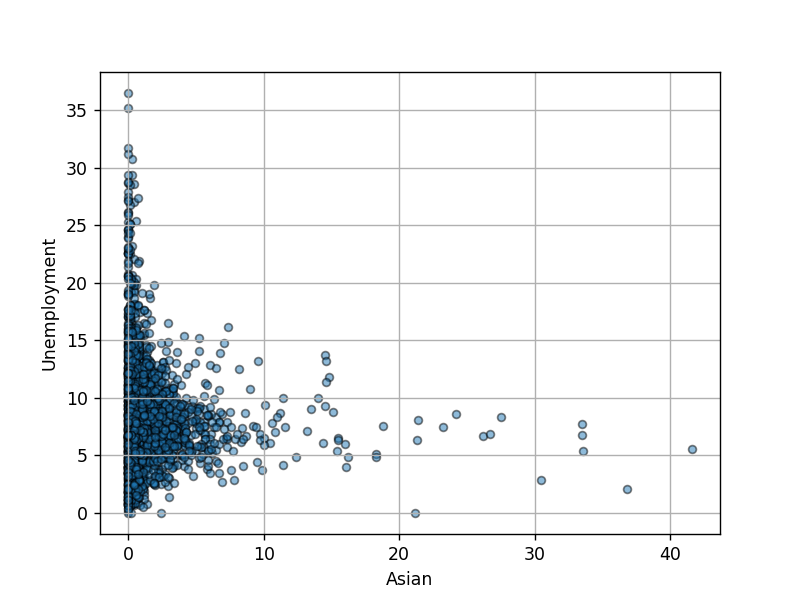

In [11]:
asian_unemp_scatter = df.plot(kind="scatter", x = "Asian", y = "Unemployment", grid=True, alpha = 0.5, edgecolors = "black")